In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
msft = pd.read_csv('../data/MSFT.csv')

In [3]:
msft.rename(
    columns=lambda x: x.lower().replace(' ', '_'),
    inplace=True
)

In [4]:
msft['date'] = pd.to_datetime(msft['date'])

In [5]:
msft.set_index('date', inplace = True)

In [6]:
msft['returns'] = msft['adj_close'].pct_change()

In [7]:
start_date = '2014-01-01'
end_date = '2018-12-31'
msft = msft.loc[start_date: end_date]

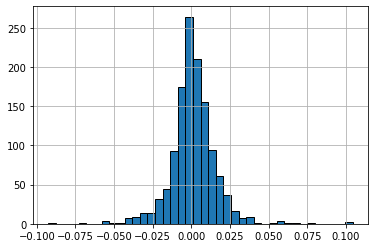

In [8]:
msft['returns'].hist(ec='k', bins=40);

In [9]:
msft['returns'].describe()

count    1258.000000
mean        0.000996
std         0.014591
min        -0.092534
25%        -0.005956
50%         0.000651
75%         0.007830
max         0.104522
Name: returns, dtype: float64

In [10]:
R_mean = msft['returns'].mean()
R_std = msft['returns'].std()

R_rv = stats.norm(
    loc = R_mean,
    scale = R_std
)

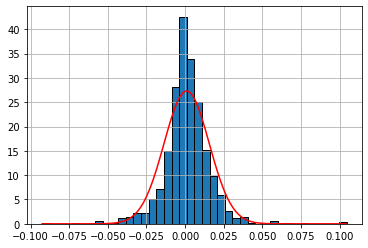

In [12]:
fig, ax = plt.subplots()

ax.hist(
    x = msft['returns'],
    ec = 'k',
    bins = 40,
    density = True,
);

x_values = np.linspace(msft['returns'].min(), msft['returns'].max(), num=100)
densities = R_rv.pdf(x_values)
ax.plot(x_values, densities, color='r')
ax.grid();